In [1]:
import torch
import os
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image
from IPython.display import display

In [2]:
dataset_path = 'data/'
assert(os.path.isdir(dataset_path))
assert(dataset_path.endswith('/'))

labels = [folder for folder in os.listdir(dataset_path) if os.path.isdir(dataset_path+folder) and len(os.listdir(dataset_path+folder)) > 0]

print("Available labels:", ", ".join(labels))

Available labels: cat, dog, other, peacock


In [3]:
def sample_from_label(dataset_path, label, full_path=False):
    assert(os.path.isdir(dataset_path+label))
    path = dataset_path + label + '/' if full_path else ''
    return path + np.random.choice(os.listdir(dataset_path+label))

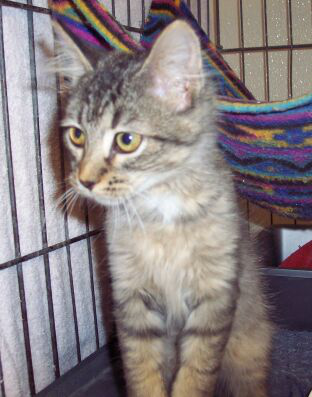

In [4]:
cat_sample_file = sample_from_label(dataset_path, 'cat', full_path=True)
cat_image = Image.open(cat_sample_file)
display(cat_image)

# Select a model

In [5]:
import torchvision
from torchvision.models import resnet50, ResNet50_Weights, list_models
from torchvision.io import read_image

In [6]:
classification_models = list_models(module=torchvision.models)
classification_models

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'googlenet',
 'inception_v3',
 'maxvit_t',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1_6gf',
 'regnet_y_32gf',
 'regnet_y_3_2gf',
 'regnet_y_400mf',
 'regnet_y_800mf',
 'regnet_y_8gf',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext101_64x4d',
 'resnext50_32x4d',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'sh

In [7]:
weights = ResNet50_Weights.IMAGENET1K_V1
preprocess = weights.transforms()
model = resnet50(weights=weights)
model.eval()

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

In [9]:
cat_rgb = read_image(cat_sample_file)
cat_rgb_preprocessed = preprocess(cat_rgb)
cat_rgb_batch = cat_rgb_preprocessed.unsqueeze(0)
cat_rgb.shape, cat_rgb_batch.shape

C:\Users\harri\anaconda3\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(torch.Size([3, 397, 312]), torch.Size([1, 3, 224, 224]))

In [10]:
cat_rgb_batch

tensor([[[[ 1.6153,  1.4783,  1.3927,  ...,  0.1083, -0.6281, -0.4226],
          [ 1.5982,  1.4098,  1.3413,  ...,  0.0741, -0.6452, -0.4397],
          [ 1.5468,  1.3070,  1.3242,  ...,  0.1426, -0.7650, -0.4226],
          ...,
          [ 0.7419,  0.8447,  0.5707,  ..., -1.1247, -1.0733, -1.1247],
          [ 0.6221,  0.7933,  0.6906,  ..., -1.1075, -1.1589, -1.0733],
          [ 0.7419,  0.8789,  0.7762,  ..., -1.0219, -0.9363, -0.8678]],

         [[ 1.7458,  1.6057,  1.5532,  ..., -0.0574, -0.7752, -0.5301],
          [ 1.7283,  1.5357,  1.5007,  ..., -0.0399, -0.7577, -0.4951],
          [ 1.6933,  1.4307,  1.4657,  ..., -0.0224, -0.8803, -0.4601],
          ...,
          [ 0.9405,  0.9930,  0.6954,  ..., -1.0728, -1.0378, -1.0728],
          [ 0.8179,  0.9405,  0.8004,  ..., -1.0378, -1.1078, -1.0203],
          [ 0.9230,  1.0280,  0.9055,  ..., -0.9328, -0.8452, -0.7752]],

         [[ 2.1520,  2.0125,  1.9777,  ..., -0.0790, -0.7761, -0.5495],
          [ 2.1346,  1.9428,  

In [11]:
cat_features = feature_extractor(cat_rgb_batch)
print(cat_features.shape, cat_features.squeeze().shape)

torch.Size([1, 2048, 1, 1]) torch.Size([2048])


In [12]:
cat_vector = cat_features.squeeze().detach().numpy()
cat_vector

array([0.33058533, 0.1250895 , 0.09291378, ..., 0.2821968 , 0.2738337 ,
       0.18536894], dtype=float32)

# Computing images features

In [22]:
def extract_features_from_image(image_path, extractor=feature_extractor):
    image_rgb = read_image(image_path)
    image_rgb_preprocessed = preprocess(image_rgb)
    image_rgb_batch = image_rgb_preprocessed.unsqueeze(0)
    image_features = feature_extractor(image_rgb_batch).squeeze().detach().numpy()
    return image_features

In [23]:
extract_features_from_image(cat_sample_file)

array([0.33058533, 0.1250895 , 0.09291378, ..., 0.2821968 , 0.2738337 ,
       0.18536894], dtype=float32)

In [24]:
dataset_features = {}

for class_label in os.listdir(dataset_path):
    for image_filename in os.listdir(os.path.join(dataset_path, class_label)):
        image_full_filename = os.path.join(dataset_path, class_label, image_filename)
        try:
            features = extract_features_from_image(image_full_filename)
            dataset_features[class_label + '_' + image_filename] = features
        except Exception as e:
            print(f'Problem loading {image_full_filename}:', str(e))

Problem loading data/cat\23.jpg: Unsupported image file. Only jpeg and png are currently supported.


# Dimensionality reduction and visualization

In [25]:
from sklearn.decomposition import PCA

In [26]:
keys = sorted(dataset_features.keys())
print(keys[:3])
key_id = {k: i for i, k in enumerate(labels)}
print(key_id)

features_matrix = np.vstack([dataset_features[img] for img in keys])
features_matrix.shape

['cat_0.jpg', 'cat_1.jpg', 'cat_10.jpg']
{'cat': 0, 'dog': 1, 'other': 2, 'peacock': 3}


(54, 2048)

In [27]:
features_matrix

array([[0.21018098, 0.15182936, 0.23536122, ..., 0.04956754, 0.6471936 ,
        0.19501106],
       [0.10093534, 0.02119019, 0.00928759, ..., 0.21763177, 0.15272024,
        0.02702272],
       [0.82631993, 0.1714193 , 0.03336118, ..., 0.6004686 , 0.32624438,
        0.27269042],
       ...,
       [0.08038709, 0.44827273, 0.24447429, ..., 0.2828386 , 0.06869269,
        0.00382893],
       [0.25736025, 0.41689742, 0.4328758 , ..., 0.7101537 , 0.03336582,
        0.47762376],
       [0.19949673, 0.04876299, 0.04967493, ..., 0.03846126, 0.18205199,
        0.41629285]], dtype=float32)

In [28]:
import matplotlib.pyplot as plt

In [29]:
pca = PCA()
components = pca.fit_transform(features_matrix, )
components.shape

(54, 54)

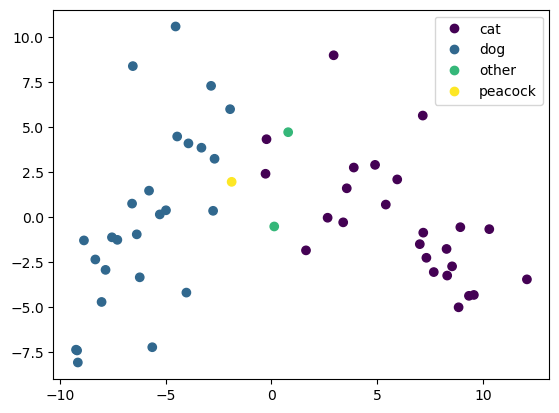

In [31]:
plot = plt.scatter(components[:,0], components[:,1], c=[key_id[k.split('_')[0]] for k in keys])
plt.legend(handles=plot.legend_elements()[0], labels=key_id)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


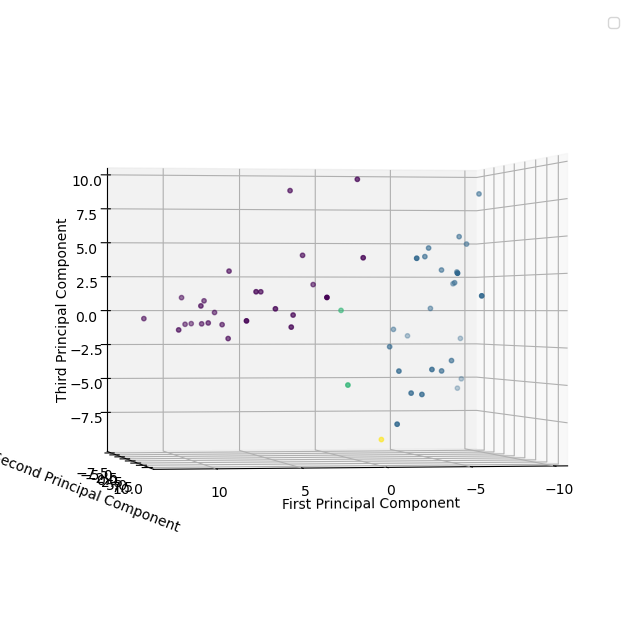

In [60]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

plot = ax.scatter(components[:,0], components[:,1], components[:,2], c=[key_id[k.split('_')[0]] for k in keys], s=10,)
ax.view_init(0, 80)

ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")

ax.legend()
plt.show()
